No handles with labels found to put in legend.


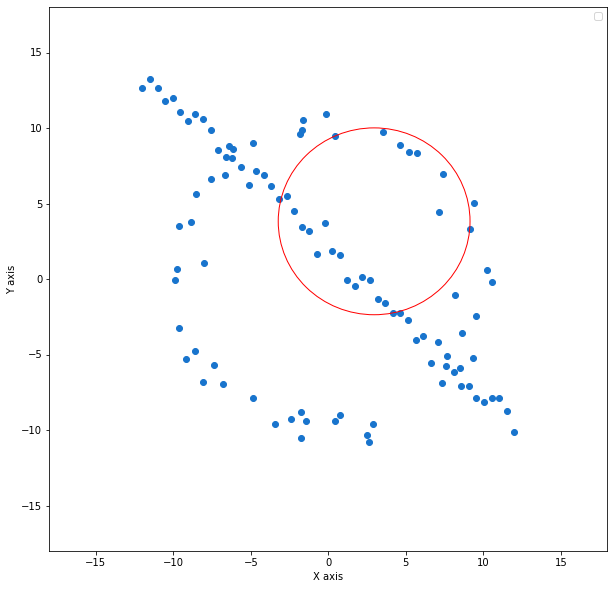

In [116]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import random

# np.random.seed(0)
N = 100
half_n = N // 2
r = 10
s = r / 16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
x, y = (r + n)*np.cos(t), (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1 ), y.reshape(half_n, 1)))
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
X = np.vstack((X_circ, X_line))

min_X = 0
max_X = 0
min_Y = 0
max_Y = 0
for point in X:
    min_X = min(point[0], min_X)
    max_X = max(point[0], max_X)
    min_Y = min(point[0], min_Y)
    max_Y = max(point[0], max_Y)
fig, ax = plt.subplots(figsize=(10,10))
for point in X:
    plt.scatter(point[0], point[1], color='#1874CD')



Iterations = 1000
Tolerance = 0.5
Max_inliers_count = 0
Max_coeff_matrix = []
Best_Sample = []
for iter in range(0, Iterations):
    rand_points = random.sample(range(0, len(X)), 3)
    point1 = rand_points[0]
    point2 = rand_points[1]
    point3 = rand_points[2]
    x1, y1 = X[point1][0], X[point1][1]
    x2, y2 = X[point2][0], X[point2][1]
    x3, y3 = X[point3][0], X[point3][1]
    matrix_1 = np.array([[x1, y1, 1],[x2, y2, 1],[x3, y3, 1]])
    matrix_2 = np.array([[-(x1**2 + y1**2)],[-(x2**2 + y2**2)],[-(x3**2 + y3**2)]])
    try:
        matrix_1_inv = np.linalg.inv(matrix_1)
        coeff_matrix = np.matmul(matrix_1_inv, matrix_2)

        g, f, c = coeff_matrix[0]/2, coeff_matrix[1]/2, coeff_matrix[2] # circle
        radius = (g**2 + f**2 - c)**0.5
        center = [-g, -f]

        inliers_count = 0
        for point in X:
            distance = ((point[0] - center[0])**2 + (point[0] - center[0])**2)**0.5  # distance to a point from center of the circle
            diff_dis = abs(distance - radius)
            if diff_dis < Tolerance:
                inliers_count += 1
        if inliers_count > Max_inliers_count:
            Max_coeff_matrix = coeff_matrix
            Max_inliers_count = inliers_count
    except: # if matrix_1 is a singular matrix then continue
        continue

g, f, c = Max_coeff_matrix[0]/2, Max_coeff_matrix[1]/2, Max_coeff_matrix[2]
radius = (g**2 + f**2 - c)**0.5

cir1 = plt.Circle((-g, -f), radius, color='red', fill=False)
ax.add_patch(cir1)

plt.xlim([-18, 18])
plt.ylim([-18, 18])
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()



        





    


No handles with labels found to put in legend.


39
[10.30784631]


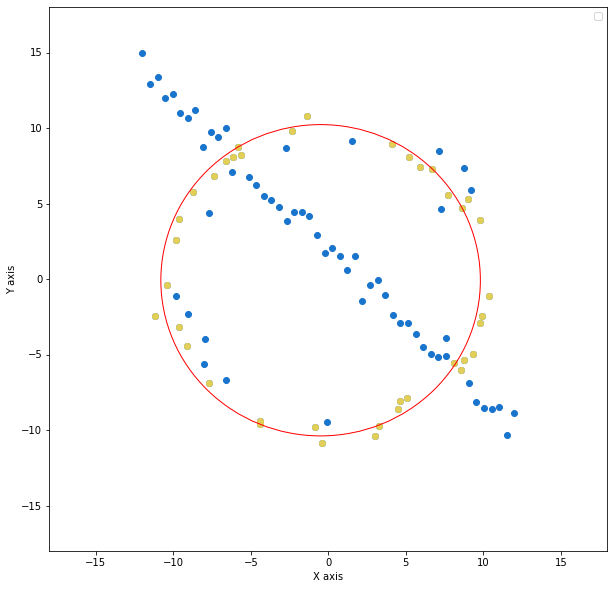

In [198]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import random

# np.random.seed(0)
N = 100
half_n = N // 2
r = 10
s = r / 16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
x, y = (r + n)*np.cos(t), (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1 ), y.reshape(half_n, 1)))
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
X = np.vstack((X_circ, X_line))

Iterations = 100
Tolerance = 0.8
Max_inliers_count = 0
Max_coeff_matrix = []
Max_inlier_points = []
for iter in range(0, Iterations):
    rand_points = random.sample(range(0, len(X)), 3)
    point1 = rand_points[0]
    point2 = rand_points[1]
    point3 = rand_points[2]
    x1, y1 = X[point1][0], X[point1][1]
    x2, y2 = X[point2][0], X[point2][1]
    x3, y3 = X[point3][0], X[point3][1]
    matrix_1 = np.array([[x1, y1, 1],[x2, y2, 1],[x3, y3, 1]])
    matrix_2 = np.array([[-(x1**2 + y1**2)],[-(x2**2 + y2**2)],[-(x3**2 + y3**2)]])
    try:
        matrix_1_inv = np.linalg.inv(matrix_1)
        coeff_matrix = np.matmul(matrix_1_inv, matrix_2)

        g, f, c = coeff_matrix[0]/2, coeff_matrix[1]/2, coeff_matrix[2] # circle
        radius = (g**2 + f**2 - c)**0.5
        center = [-g, -f]

        if radius < 20:
            inlier_points = []
            inliers_count = 0
            for point in X:
                distance = ((point[0] - center[0])**2 + (point[1] - center[1])**2)**0.5  # distance to a point from center of the circle
                diff_dis = abs(distance - radius)
                if diff_dis < Tolerance:
                    inlier_points.append(point)
                    inliers_count += 1
            if inliers_count >= Max_inliers_count:
                Max_coeff_matrix = coeff_matrix
                Max_inliers_count = inliers_count
                Max_inlier_points = inlier_points[:]
    except: # if matrix_1 is a singular matrix then continue
        continue

g, f, c = Max_coeff_matrix[0]/2, Max_coeff_matrix[1]/2, Max_coeff_matrix[2]
radius = (g**2 + f**2 - c)**0.5
print(Max_inliers_count)
print(radius)
fig, ax = plt.subplots(figsize=(10,10))


    
for point in X:
    plt.scatter(point[0], point[1], color='#1874CD')
for point in Max_inlier_points:
    plt.scatter(point[0], point[1], color='#E3CF57')
cir1 = plt.Circle((-g, -f), radius, color='red', fill=False)
ax.add_patch(cir1)
plt.xlim([-18, 18])
plt.ylim([-18, 18])
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()



        





    
